# LAB-2.2 : PREDICTING CO2 EMMISIONS USING REGRESSION ANALYSIS

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\\CO2 Emissions.csv",sep=";")

In [49]:
df

Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0        ACURA,ILX,COMPACT,2,4,AS5,Z,9.9,6.7,8.5,33,196                                                                                                                                                                        
1      ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221                                                                                                                                                                        
2     ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6,5.8,5.9...                                                                                                                                                                        
3     ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1...                                                                                                                                                                        
4     ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7...                                                                                                                                                                        
...                                                 ...                                                                                                                                                                        
7380  VOLVO,XC40 T5 AWD,SUV - SMALL,2,4,AS8,Z,10.7,7...                                                                                                                                                                        
7381  VOLVO,XC60 T5 AWD,SUV - SMALL,2,4,AS8,Z,11.2,8...                                                                                                                                                                        
7382  VOLVO,XC60 T6 AWD,SUV - SMALL,2,4,AS8,Z,11.7,8...                                                                                                                                                                        
7383  VOLVO,XC90 T5 AWD,SUV - STANDARD,2,4,AS8,Z,11....                                                                                                                                                                        
7384  VOLVO,XC90 T6 AWD,SUV - STANDARD,2,4,AS8,Z,12....                                                                                                                                                                        

[7385 rows x 1 columns]

In [51]:
df.head()
df.tail()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                      --------------  ----- 
 0   Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)  7385 non-null   object
dtypes: object(1)
memory usage: 57.8+ KB


Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count                                                7385                                                                                                                                                                        
unique                                               6282                                                                                                                                                                        
top     LEXUS,GS F,COMPACT,5,8,AS8,Z,14.9,9.7,12.5,23,293                                                                                                                                                                        
freq                                                    5

#STEP DATA EXPLORATION

In [54]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                      --------------  ----- 
 0   Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)  7385 non-null   object
dtypes: object(1)
memory usage: 57.8+ KB


Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)    0
dtype: int64

In [56]:
df.isnull().sum()

Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)    0
dtype: int64

In [58]:
print(df.shape)  
print(df.head()) 


(7385, 1)
  Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0     ACURA,ILX,COMPACT,2,4,AS5,Z,9.9,6.7,8.5,33,196                                                                                                                                                                        
1   ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221                                                                                                                                                                        
2  ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6,5.8,5.9...                                                                                                                                                                        
3  ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1...                                                      

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                      Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                      --------------  ----- 
 0   Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)  7385 non-null   object
dtypes: object(1)
memory usage: 57.8+ KB


In [60]:
df.isnull()

Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0                                                 False                                                                                                                                                                         
1                                                 False                                                                                                                                                                         
2                                                 False                                                                                                                                                                         
3                                                 False                                                                                                                                                                         
4                                                 False                                                                                                                                                                         
...                                                 ...                                                                                                                                                                         
7380                                              False                                                                                                                                                                         
7381                                              False                                                                                                                                                                         
7382                                              False                                                                                                                                                                         
7383                                              False                                                                                                                                                                         
7384                                              False                                                                                                                                                                         

[7385 rows x 1 columns]

In [64]:
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\CO2 Emissions.csv", header=None)
df.columns = ["Make", "Model", "Vehicle Class", "Engine Size(L)", "Cylinders", "Transmission", 
              "Fuel Type", "Fuel Consumption City (L/100 km)", "Fuel Consumption Hwy (L/100 km)", 
              "Fuel Consumption Comb (L/100 km)", "Fuel Consumption Comb (mpg)", "CO2 Emissions(g/km)"]


Numerical Columns: Index([], dtype='object')
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Make                                float64
Model                               float64
Vehicle Class                       float64
Engine Size(L)                      float64
Cylinders                           float64
Transmission                        float64
Fuel Type                           float64
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)         float64
CO2 Emissions(g/km)                 float64
dtype: object


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


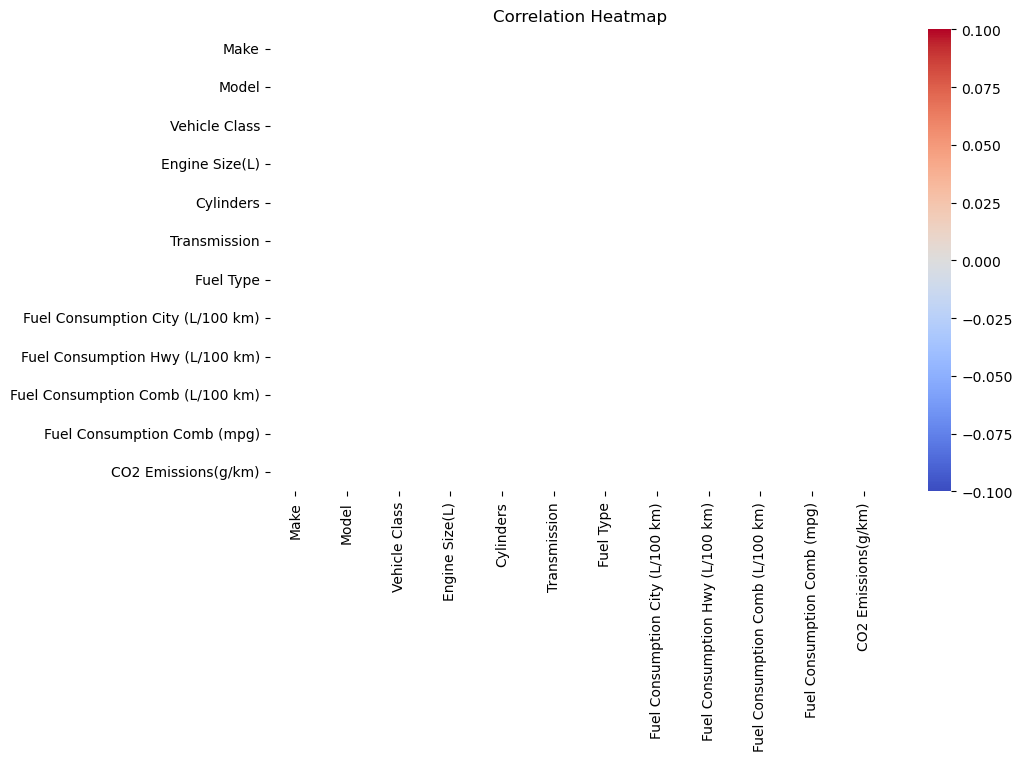

In [68]:
numeric_df = df.select_dtypes(include=['number'])
print("Numerical Columns:", numeric_df.columns)
print(numeric_df.head())  # Check if values are numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaN
print(df.dtypes)  # Confirm that numbers are correctly formatted
df_cleaned = df.dropna()
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


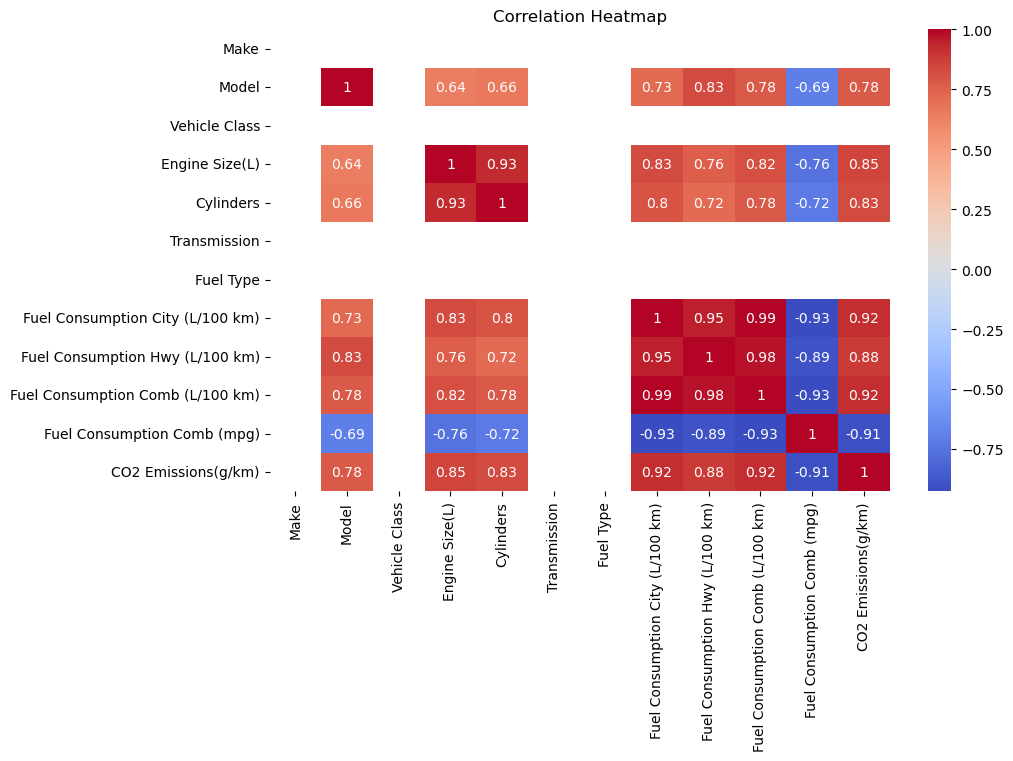

In [70]:
# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

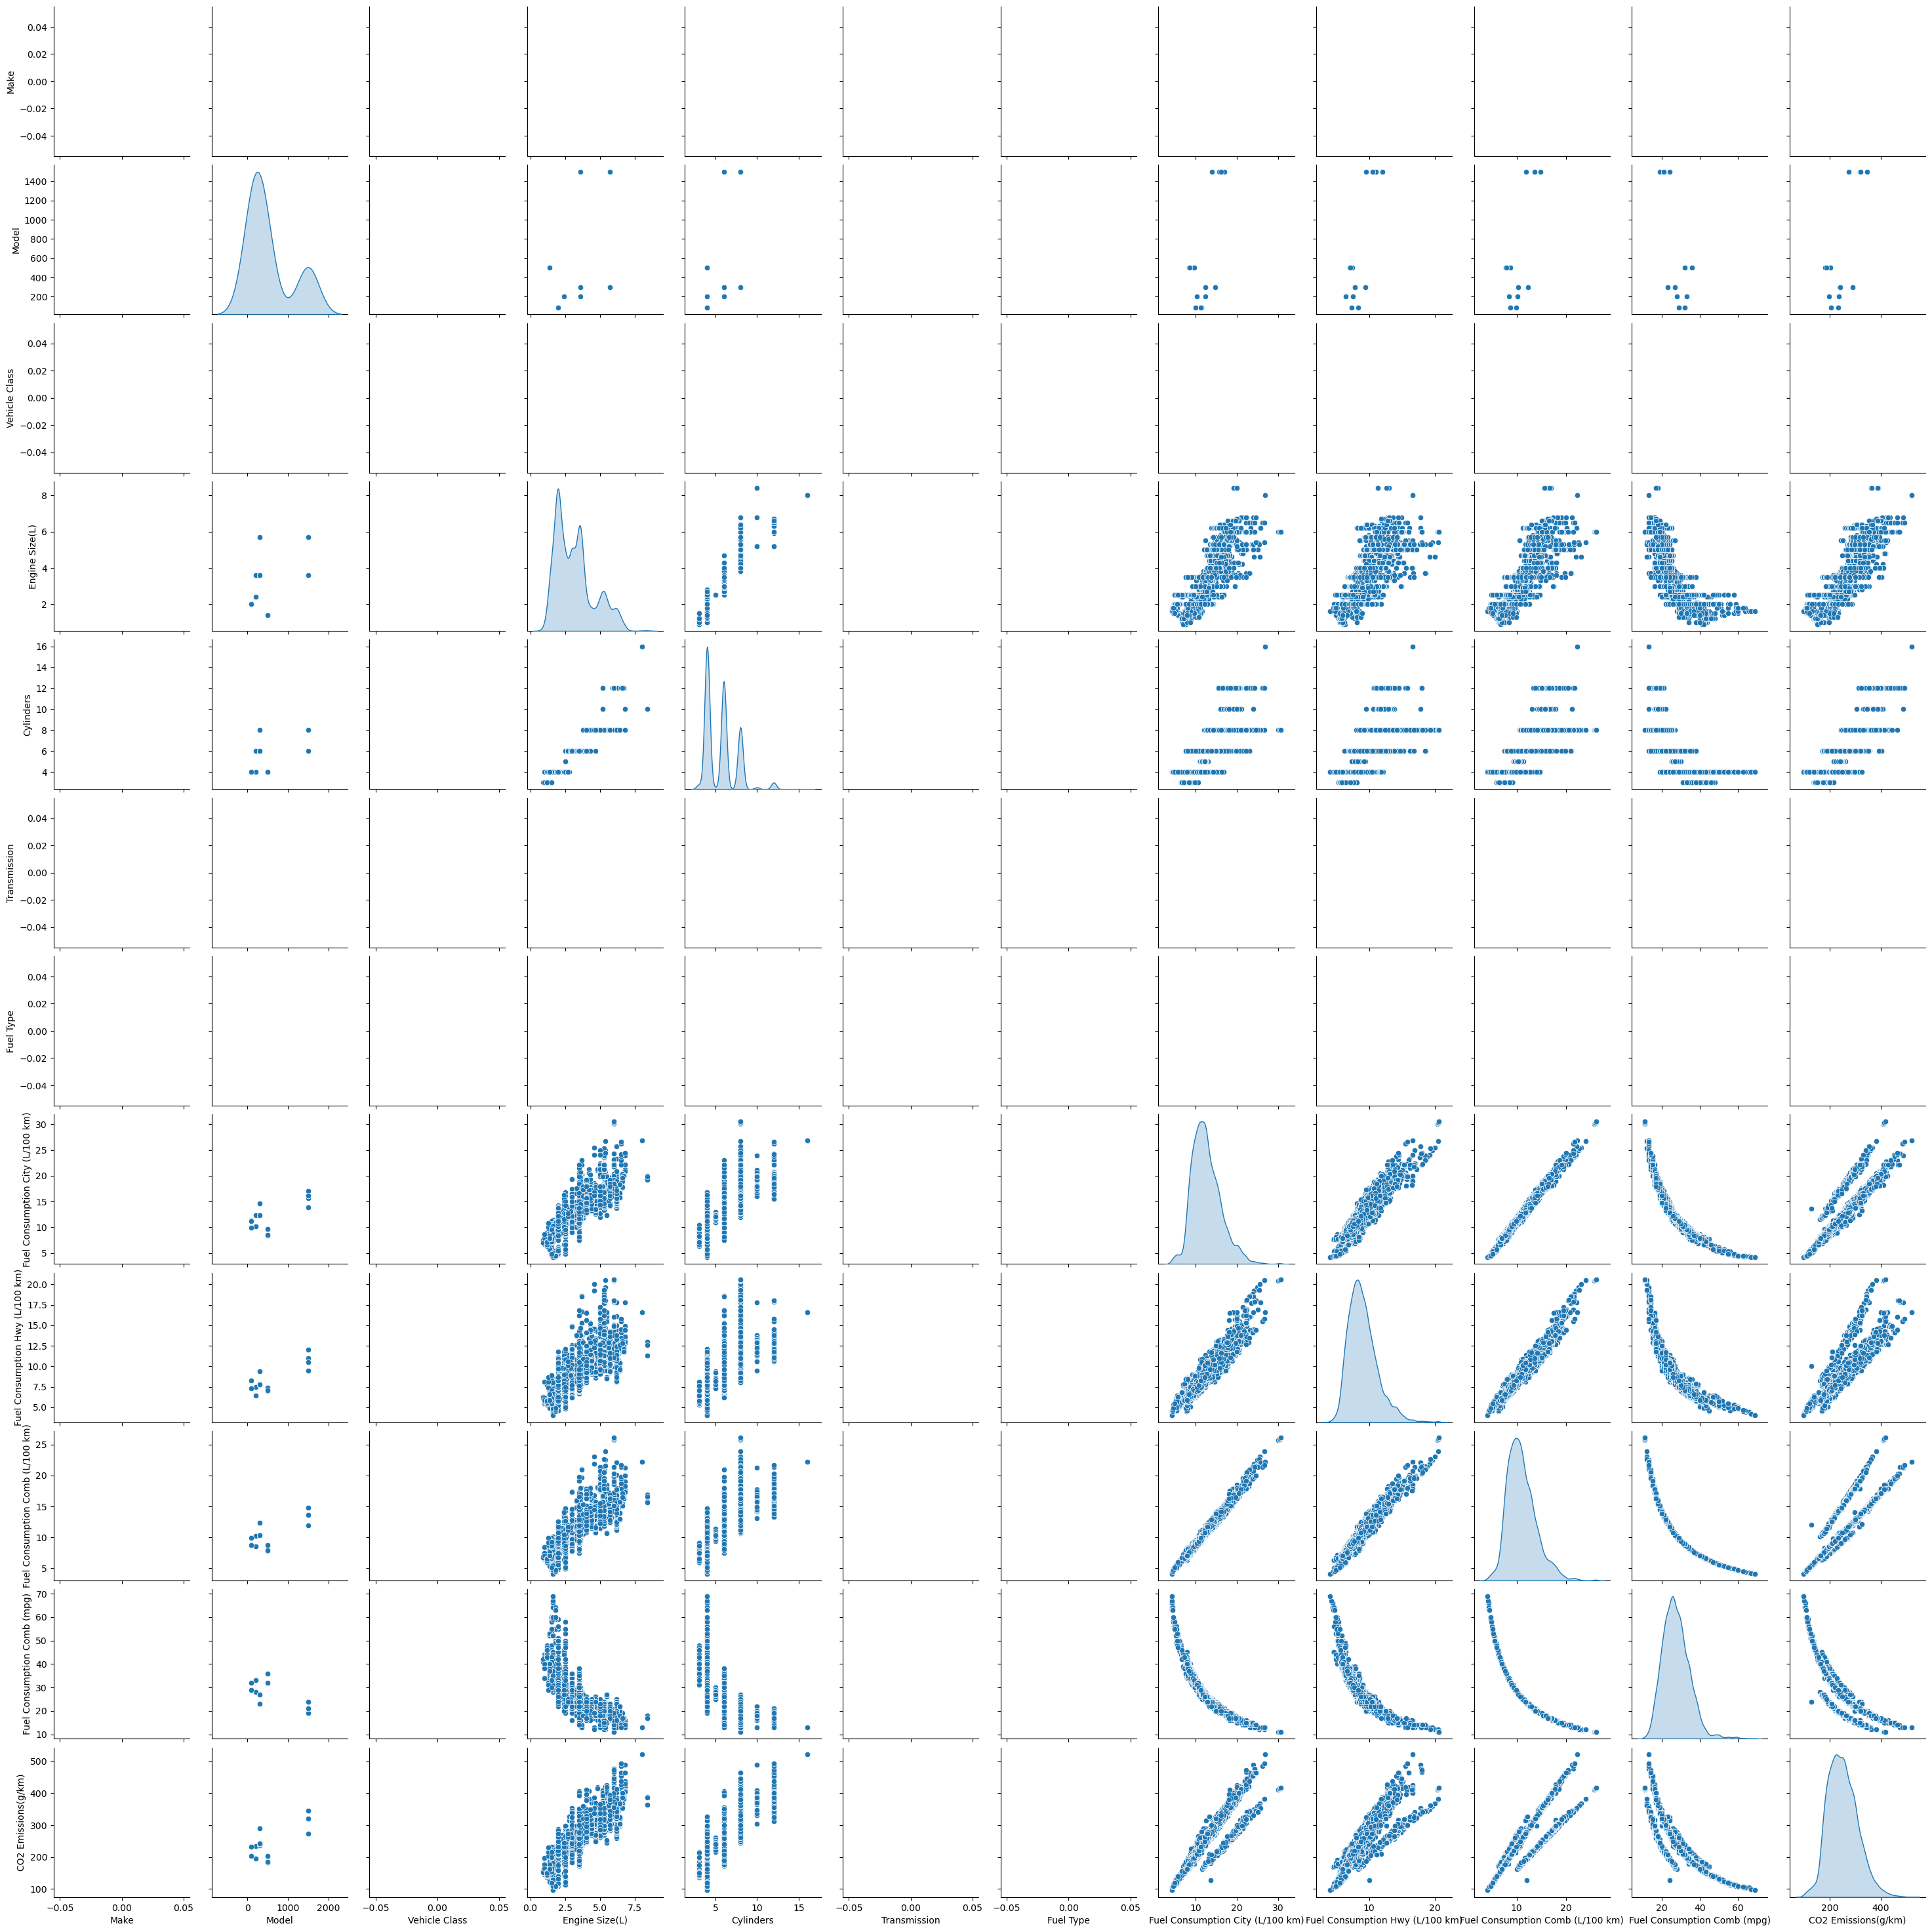

In [72]:

sns.pairplot(df.select_dtypes(include=['number']), diag_kind='kde')
plt.show()


In [84]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [86]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [94]:
print(X_train.head())  # Check if features are correctly structured
print(y_train.head())  # Check if target variable exists


      Engine Size(L)  Fuel Consumption Comb (L/100 km)
6275             4.0                              12.7
2251             3.0                              11.0
3149             3.4                              10.7
4362             2.0                               9.4
3881             5.0                              13.3
6275    299.0
2251    257.0
3149    250.0
4362    220.0
3881    313.0
Name: CO2 Emissions(g/km), dtype: float64


In [96]:
print(X_test.isnull().sum())  # Shows count of NaN values per column
X_train_cleaned = X_train.dropna()
X_test_cleaned = X_test.dropna()
y_train_cleaned = y_train[X_train_cleaned.index]  # Keep corresponding y values
y_test_cleaned = y_test[X_test_cleaned.index]


Engine Size(L)                      1
Fuel Consumption Comb (L/100 km)    1
dtype: int64


In [100]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # Options: "median", "most_frequent"
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [102]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [112]:
print("Missing values in y_test_cleaned:", y_test_cleaned.isnull().sum())
print("Missing values in y_pred_cleaned:", np.isnan(y_pred_cleaned).sum())  # If y_pred_cleaned is a NumPy array


Missing values in y_test_cleaned: 1
Missing values in y_pred_cleaned: 0


In [114]:
valid_indices = ~np.isnan(y_pred_cleaned)
y_test_cleaned = y_test_cleaned[valid_indices]
y_pred_cleaned = y_pred_cleaned[valid_indices]



In [116]:
y_test_cleaned.fillna(y_test_cleaned.mean(), inplace=True)
y_pred_cleaned[np.isnan(y_pred_cleaned)] = np.nanmean(y_pred_cleaned)  # Replace NaN with mean



In [118]:
print(y_test_cleaned[:5])  # Should not contain NaNs
print(y_pred_cleaned[:5])  # Should be clean



7262    253.0
4489    283.0
1539    275.0
3532    121.0
6419    308.0
Name: CO2 Emissions(g/km), dtype: float64
[253.9241516  282.57194479 278.37646119 120.85763597 308.70079567]


In [120]:
mae = mean_absolute_error(y_test_cleaned, y_pred_cleaned)
mse = mean_squared_error(y_test_cleaned, y_pred_cleaned)
r2 = r2_score(y_test_cleaned, y_pred_cleaned)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")


Mean Absolute Error (MAE): 4.27
Mean Squared Error (MSE): 83.34
R-squared Score (R2): 0.98


In [39]:
print(df.columns)  # Should now display separate column names
print(df.head())   # Check the first few rows


Index(['Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)'], dtype='object')
  Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0     ACURA,ILX,COMPACT,2,4,AS5,Z,9.9,6.7,8.5,33,196                                                                                                                                                                        
1   ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221                                                                                                                                                                        
2  ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6,5.8,5.9...                                       

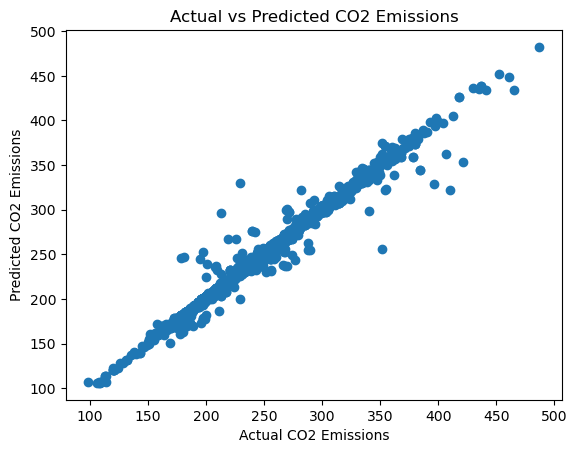

In [122]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.show()

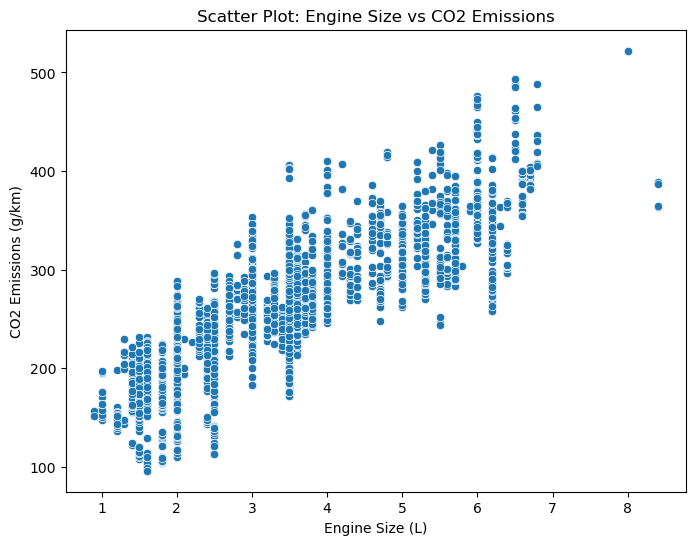

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Engine Size(L)'], y=df['CO2 Emissions(g/km)'])
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Scatter Plot: Engine Size vs CO2 Emissions")
plt.show()


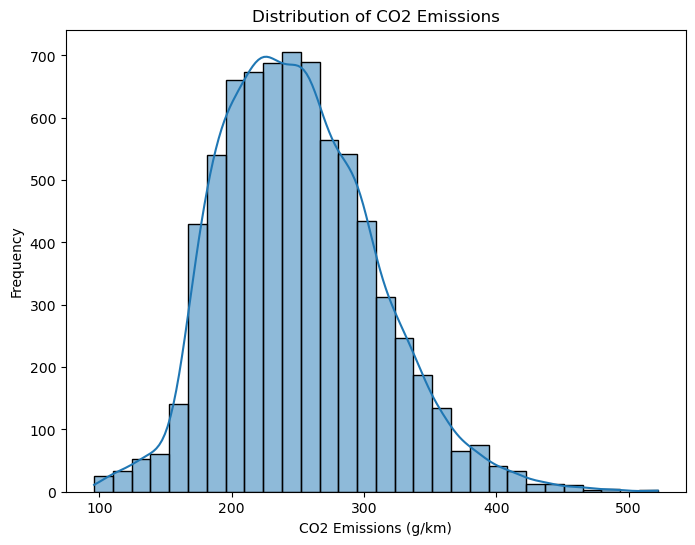

In [126]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CO2 Emissions(g/km)'], bins=30, kde=True)
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.title("Distribution of CO2 Emissions")
plt.show()


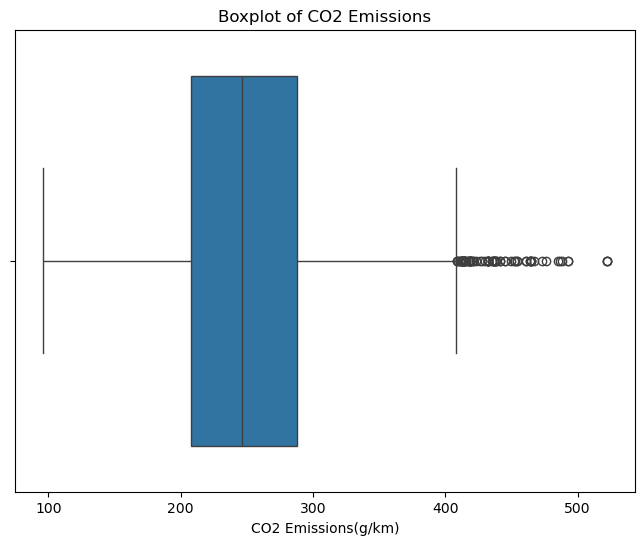

In [128]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['CO2 Emissions(g/km)'])
plt.title("Boxplot of CO2 Emissions")
plt.show()


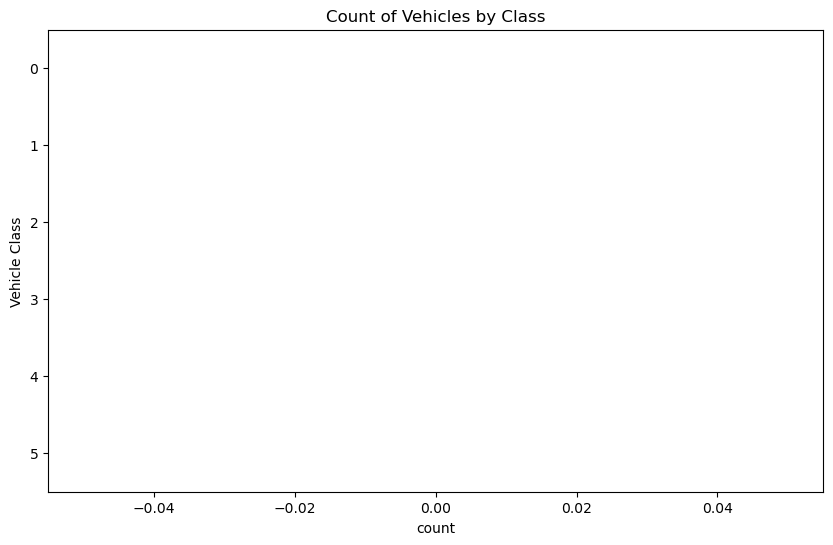

In [130]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Vehicle Class'])
plt.title("Count of Vehicles by Class")
plt.show()


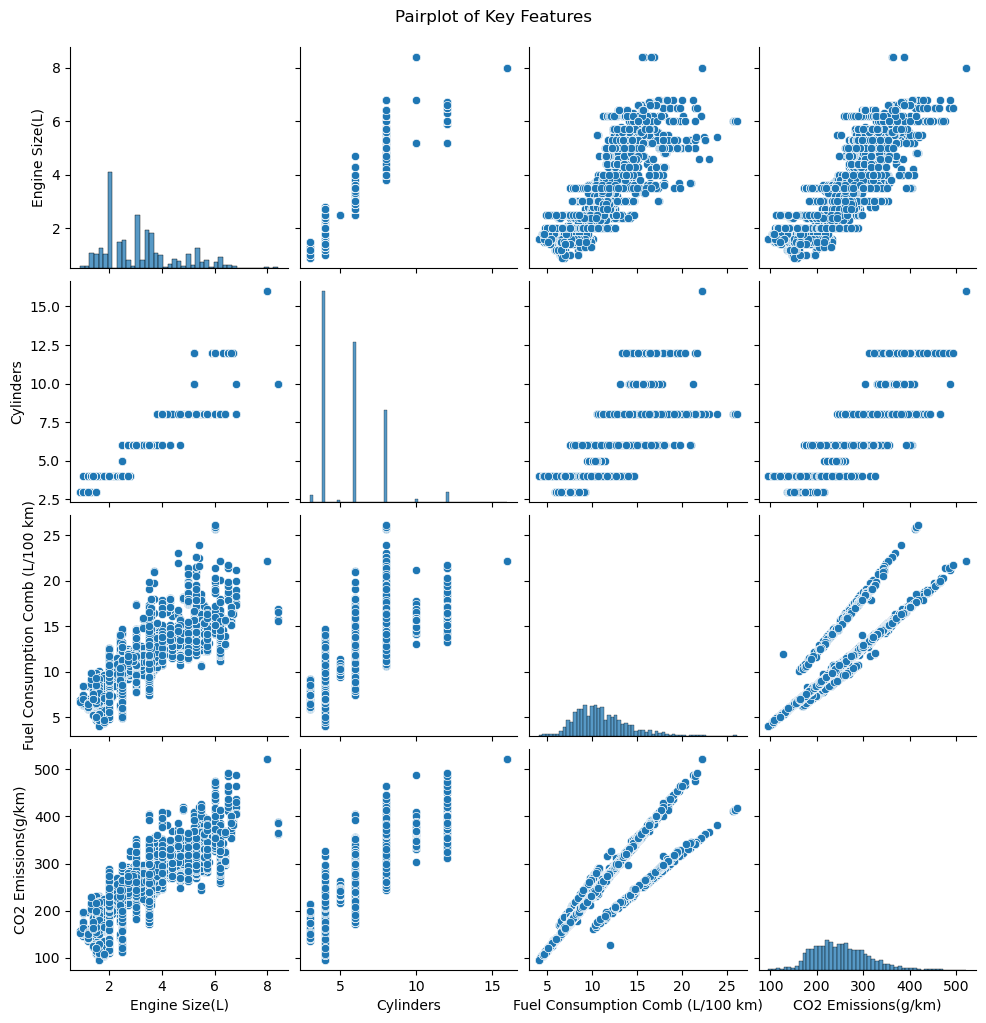

In [132]:
sns.pairplot(df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


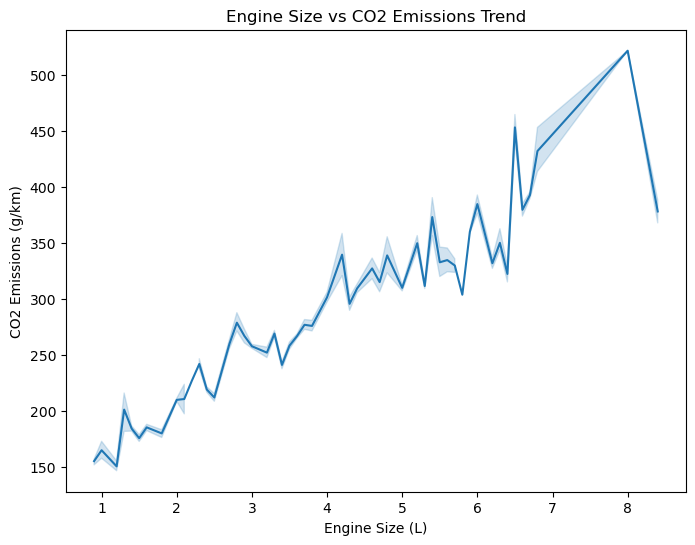

In [134]:
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['Engine Size(L)'], y=df['CO2 Emissions(g/km)'])
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.title("Engine Size vs CO2 Emissions Trend")
plt.show()


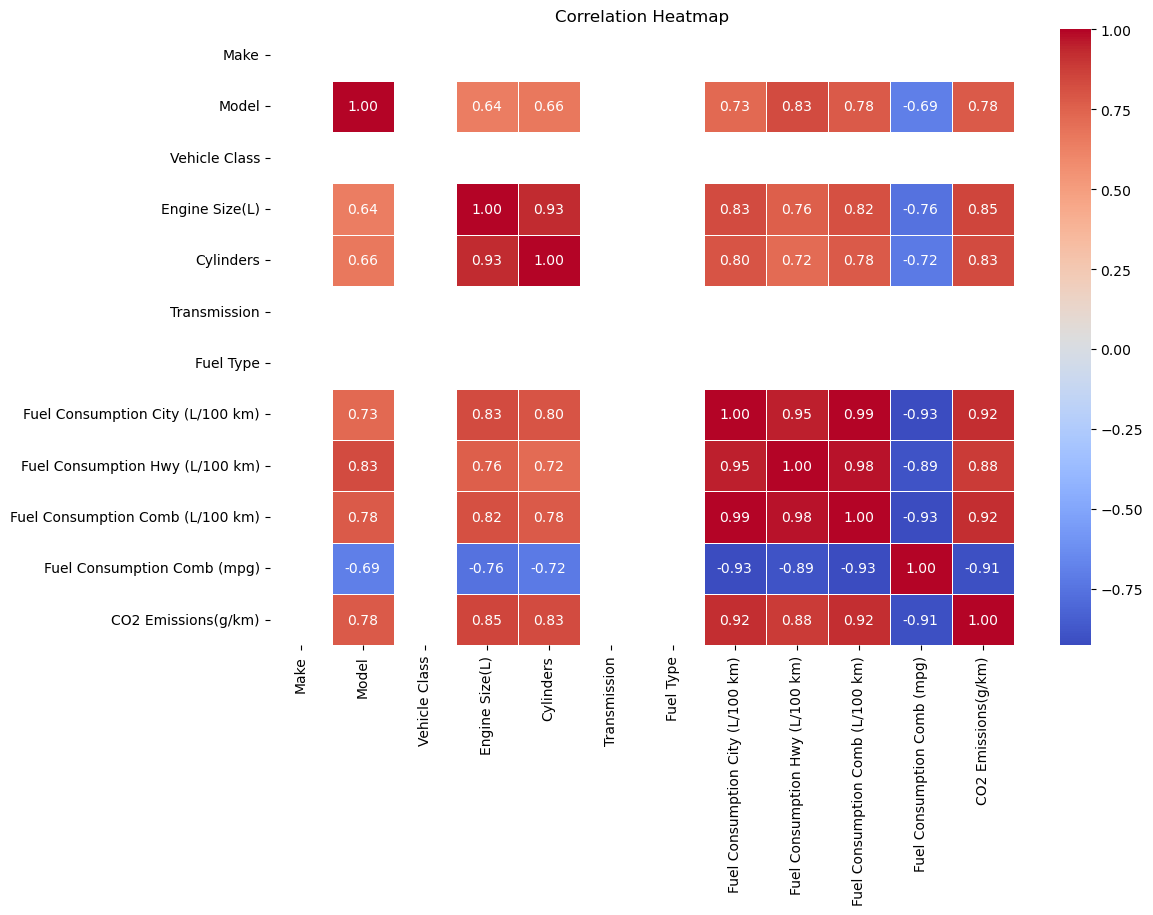

In [136]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
